In [72]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

In [73]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-06-27 14:24:37,127 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-27 14:24:37,130 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-06-27 14:24:37,130 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-27 14:24:37,132 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-06-27 14:24:37,133 Parameters: cosmological_simulation   = 0.0


In [74]:
def plot2(x,y,z,Title,four=True, vmin_=None, vmax_=None):
    x_bin = 10**np.linspace(np.log10(np.max(x))-5,np.log10(np.max(x)),30)
    y_bin = 10**np.linspace(np.log10(np.max(y))-5,np.log10(np.max(y)),30)
 
    
    get_cmap("cet_CET_R3")
    
    if four == True:
    
        fig = plt.figure(figsize=(18,8))

        p1 = fig.add_subplot(1,3,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.xlim(10**-30, 10**-25)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')
        plt.title(Title[0], fontsize=18)

        hist1,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        
        p2 = fig.add_subplot(1,3,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.xlim(10**-30, 10**-25)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(color='white')

        hist2,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
#         cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb2.remove()
        
        
        p3 = fig.add_subplot(1,3,3)
        p3.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[2], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(color='white')

        hist3,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[2])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist3.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb3 = plt.colorbar()
        cb3.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb3.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        plt.tight_layout(pad=6)
        
        h1_bins = np.zeros(len(hist1))
        h2_bins = np.zeros(len(hist2))
        h3_bins = np.zeros(len(hist3))

        
        for i in range(len(hist1)):
            h1_bins[i] = np.sum(hist1[i])
            h2_bins[i] = np.sum(hist2[i])
            h3_bins[i] = np.sum(hist3[i])
        
        
        print('hist 1 sum: ', "{:.3e}".format(np.sum(hist1)))
        print('hist 1 max bin: ', "{:.3e}".format(np.max(h1_bins)))
        print('hist 1 min bin: ', "{:.3e}".format(np.min(h1_bins[np.nonzero(h1_bins)])))
        print(' ')
        print('hist 2 sum: ', "{:.3e}".format(np.sum(hist2)))
        print('hist 2 max bin: ', "{:.3e}".format(np.max(h2_bins)))
        print('hist 2 min bin: ', "{:.3e}".format(np.min(h2_bins[np.nonzero(h2_bins)])))
        print(' ')
        print('hist 3 sum: ', "{:.3e}".format(np.sum(hist3)))
        print('hist 3 max bin: ', "{:.3e}".format(np.max(h3_bins)))
        print('hist 3 min bin: ', "{:.3e}".format(np.min(h3_bins[np.nonzero(h3_bins)])))

       
        
    else:
        fig = plt.figure(figsize=(14,8))

        p1 = fig.add_subplot(1,2,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[0], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist1,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        p2 = fig.add_subplot(1,2,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(color='w')

        hist2,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
        cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        plt.tight_layout(pad=8)
        
        h1_bins = np.zeros(len(hist1))
        h2_bins = np.zeros(len(hist2))
     
        for i in range(len(hist1)):
            h1_bins[i] = np.sum(hist1[i])
            h2_bins[i] = np.sum(hist2[i])
        
        print('hist 1 sum: ', "{:.3e}".format(np.sum(hist1)))
        print('hist 1 max bin: ', "{:.3e}".format(np.max(h1_bins)))
        print('hist 1 min bin: ', "{:.3e}".format(np.min(h1_bins[np.nonzero(h1_bins)])))
        print(' ')
        print('hist 2 sum: ', "{:.3e}".format(np.sum(hist2)))
        print('hist 2 max bin: ', "{:.3e}".format(np.max(h2_bins)))
        print('hist 2 min bin: ', "{:.3e}".format(np.min(h2_bins[np.nonzero(h2_bins)])))

In [146]:
def big_plot(x,y,z,Title,four=True, vmin_=None, vmax_=None):
#     x_bin = np.zeros(len(x))
#     y_bin = np.zeros(len(y))
    
    x_bin = []
    y_bin = []
    
    for i in range(len(x)):
        xbin = 10**np.linspace(np.log10(np.max(x[i]))-5,np.log10(np.max(x[i])),30)
        ybin = 10**np.linspace(np.log10(np.max(y[i]))-5,np.log10(np.max(y[i])),30)
        
        x_bin.append(xbin)
        y_bin.append(ybin)
 
    
    get_cmap("cet_CET_R3")
    
    if four == True:
    
        fig = plt.figure(figsize=(16,15))

        p1 = fig.add_subplot(3,3,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.xlim(10**-30, 10**-25)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')
        plt.title(Title[0], fontsize=18)

        hist1,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        
        p2 = fig.add_subplot(3,3,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.xlim(10**-30, 10**-25)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist2,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
#         cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb2.remove()
        
        
        p3 = fig.add_subplot(3,3,3)
        p3.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[2], fontsize=18)
        plt.xticks(fontsize='large')
#         plt.xticks(ticks=[])
        plt.yticks(ticks=[])

        hist3,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[2])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist3.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb3 = plt.colorbar()
        cb3.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb3.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p4 = fig.add_subplot(3,3,4)
        p4.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[3], fontsize=18)
        plt.xticks(fontsize='large')
#         plt.xticks(ticks=[])
        plt.yticks(fontsize='large')

        hist4,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[3])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb4 = plt.colorbar()
        cb4.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb4.remove()
        
        
        p5 = fig.add_subplot(3,3,5)
        p5.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[4], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist5,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[4])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist5.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb5 = plt.colorbar()
        cb5.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb5.remove()
        
        
        p6 = fig.add_subplot(3,3,6)
        p6.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[5], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist6,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[5])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist6.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb6 = plt.colorbar()
        cb6.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb6.set_label(label='Ion Mass [M$_\odot$]', size=14)
        
        
        p7 = fig.add_subplot(3,3,7)
        p7.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[6], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist7,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[6])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist7.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb7 = plt.colorbar()
        cb7.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb7.remove()
        
        
        
        p8 = fig.add_subplot(3,3,8)
        p8.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[7], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist8,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[7])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist8.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb8 = plt.colorbar()
        cb8.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb8.remove()
        
        
        p9 = fig.add_subplot(3,3,9)
        p9.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[8], fontsize=18)
        plt.xticks(fontsize='large')
#         plt.xticks(ticks=[])
        plt.yticks(ticks=[])

        hist9,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[8])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist9.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb9 = plt.colorbar()
        cb9.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb9.set_label(label='Ion Mass [M$_\odot$]', size=14)
        
        
        plt.tight_layout(h_pad=1.2, w_pad=6)



       
        
    else:
        fig = plt.figure(figsize=(12,16))

        p1 = fig.add_subplot(3,2,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[0], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist1,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        p2 = fig.add_subplot(3,2,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist2,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
        cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p3 = fig.add_subplot(3,2,3)
        p3.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[2], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist3,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[2])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist3.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb3 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb3.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb3.remove()
        
        p4 = fig.add_subplot(3,2,4)
        p4.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[3], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist4,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[3])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb4 = plt.colorbar()
        cb4.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb4.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p5 = fig.add_subplot(3,2,5)
        p5.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[4], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist5,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[4])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist5.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb5 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb5.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb5.remove()
        
        p6 = fig.add_subplot(3,2,6)
        p6.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[5], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist6,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[5])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist6.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb6 = plt.colorbar()
        cb6.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb6.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        plt.tight_layout(h_pad=2, w_pad=6)

In [152]:
def big_plot_mg(x,y,z,Title, vmin_=None, vmax_=None):
#     x_bin = np.zeros(len(x))
#     y_bin = np.zeros(len(y))
    
    x_bin = []
    y_bin = []
    
    for i in range(len(x)):
        xbin = 10**np.linspace(np.log10(np.max(x[i]))-5,np.log10(np.max(x[i])),30)
        ybin = 10**np.linspace(np.log10(np.max(y[i]))-5,np.log10(np.max(y[i])),30)
        
        x_bin.append(xbin)
        y_bin.append(ybin)
 
    
    get_cmap("cet_CET_R3")
    

    
    fig = plt.figure(figsize=(22, 7))

    p1 = fig.add_subplot(1,3,1)
    p1.set_facecolor('black')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Density $(g /cm^3)$', fontsize=18)
    plt.ylabel('Temperature [K]', fontsize=18)
    plt.xlim(10**-30, 10**-25)
#         plt.xticks(ticks=[])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(Title[0], fontsize=20)

    hist1,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[0])
    plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

    cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
    cb1.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_, vmax=vmax_)
    cb1.remove()


    p2 = fig.add_subplot(1,3,2)
    p2.set_facecolor('black')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Density $(g /cm^3)$', fontsize=18)
    plt.xlim(10**-30, 10**-25)
#         plt.ylabel('Temperature [K]', fontsize=14)
    plt.title(Title[1], fontsize=20)
#         plt.xticks(ticks=[])
    plt.xticks(fontsize=14)
    plt.yticks(ticks=[])

    hist2,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[1])
    plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

    cb2 = plt.colorbar()
#         cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
    cb2.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_, vmax=vmax_)
    cb2.remove()


    p3 = fig.add_subplot(1,3,3)
    p3.set_facecolor('black')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10**-30, 10**-25)
    plt.xlabel('Density $(g /cm^3)$', fontsize=18)
#         plt.ylabel('Temperature [K]', fontsize=14)
    plt.title(Title[2], fontsize=20)
    plt.xticks(fontsize=14)
#         plt.xticks(ticks=[])
    plt.yticks(ticks=[])

    hist3,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[2])
    plt.pcolormesh(xedges[:-1],yedges[:-1],hist3.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

    cb3 = plt.colorbar()
    cb3.set_label(label='Ion Mass [M$_\odot$]', size=18)
    cb3.ax.tick_params(labelsize=14)
    plt.clim(vmin=vmin_, vmax=vmax_)
    
    plt.tight_layout(h_pad=2.5, w_pad=7.5)


In [77]:
def name(ions, N=3):
    Titles = []

    for i in range(N):
        for j in range(len(ions)):
            titles =  ions[j] + ' (Ray ' + str(int(i)+1) + ')'
            Titles.append(titles)
    return Titles

In [78]:
def make_ray(x0, y0, z0, x, y, z, file):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= file,
                                 lines='all',
                                 ftype='gas')
    return ray

# Make Rays and Add Ionization Fields

In [80]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 'ray1.h5')
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 'ray2.h5')
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 'ray3.h5')

yt : [INFO     ] 2022-06-27 14:25:32,006 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-06-27 14:25:32,007 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-06-27 14:25:32,645 Saving field data to yt dataset: ray1.h5.
yt : [INFO     ] 2022-06-27 14:25:32,732 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-06-27 14:25:32,733 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-06-27 14:25:32,733 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-06-27 14:25:32,733 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-06-27 14:25:32,734 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-06-27 14:25:32,744 Getting segment at z = 0.0: [0.5264 0.     0.259 ] unitary to [0.5264 0.5    0.259 ] unitary.
yt : [INFO  

In [81]:
trident.add_ion_fields(ray3, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 14:25:38,626 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 14:25:38,635 Identified 1.210e+02 octs


In [82]:
trident.add_ion_fields(ray2, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 14:25:40,280 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 14:25:40,290 Identified 1.210e+02 octs


In [83]:
trident.add_ion_fields(ray1, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 14:25:40,885 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 14:25:40,894 Identified 1.210e+02 octs


# Good ol' H

In [84]:
den = np.array(ray1.all_data()[('gas','density')])
temp = np.array(ray1.all_data()[('gas','temperature')])
M= 1.9884099E30 

In [85]:
HI1 = np.array(ray1.all_data()['H_p0_mass'])/M
HII1 = np.array(ray1.all_data()['H_p1_mass'])/M

den2 = np.array(ray2.all_data()[('gas','density')])
temp2 = np.array(ray2.all_data()[('gas','temperature')])
HI2 = np.array(ray2.all_data()['H_p0_mass'])/M
HII2 = np.array(ray2.all_data()['H_p1_mass'])/M

den3 = np.array(ray3.all_data()[('gas','density')])
temp3 = np.array(ray3.all_data()[('gas','temperature')])
HI3 = np.array(ray3.all_data()['H_p0_mass'])/M
HII3 = np.array(ray3.all_data()['H_p1_mass'])/M

xx = np.array([den,den2,den3])
yy = np.array([temp,temp2,temp3])
Hz = [HI1, HII1, HI2, HII2, HI3, HII3]

H_titles = name(['H I', 'H II'])

<ipython-input-97-ec5d9c9d3148>:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-97-ec5d9c9d3148>:255: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-97-ec5d9c9d3148>:275: MatplotlibDeprecationWarning: shading='flat' when X and Y h

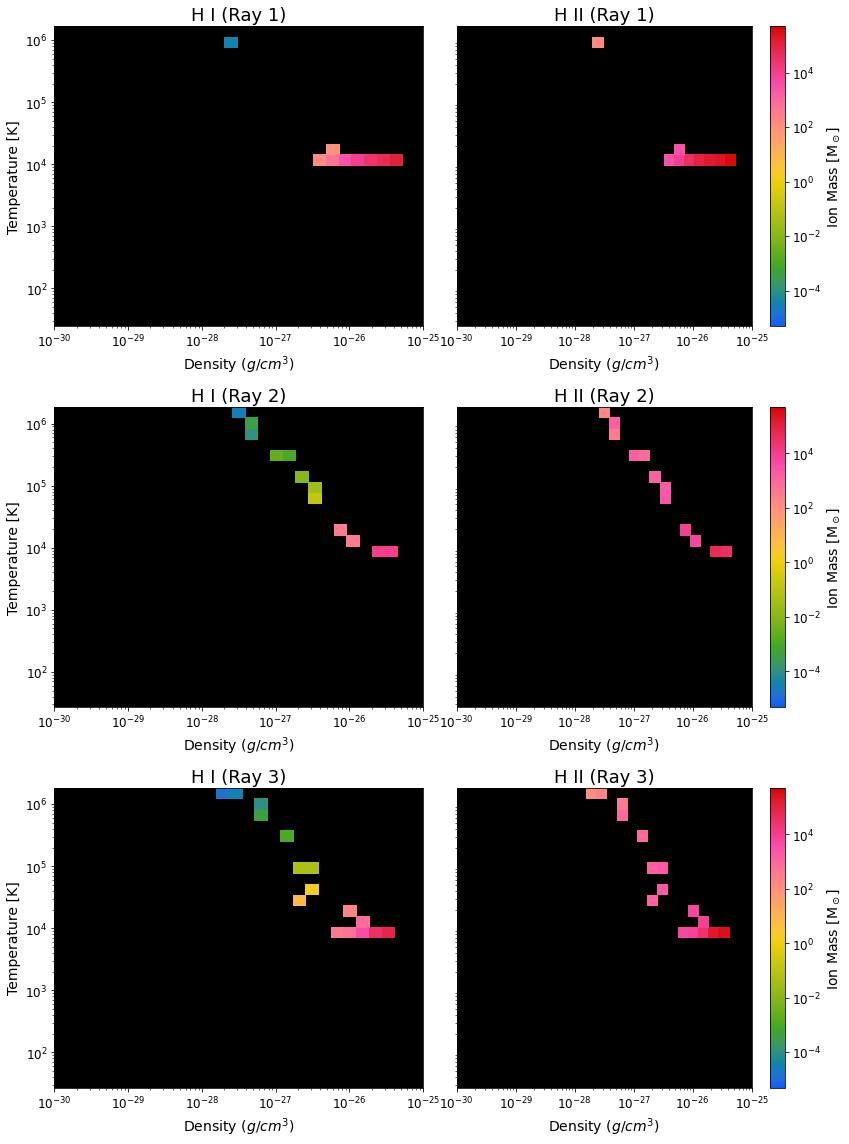

In [98]:
big_plot(xx,yy,Hz,H_titles,vmin_=5*10**-6, vmax_=5*10**5, four=False)

# Si

<ipython-input-104-4d57cb60e9b4>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y h

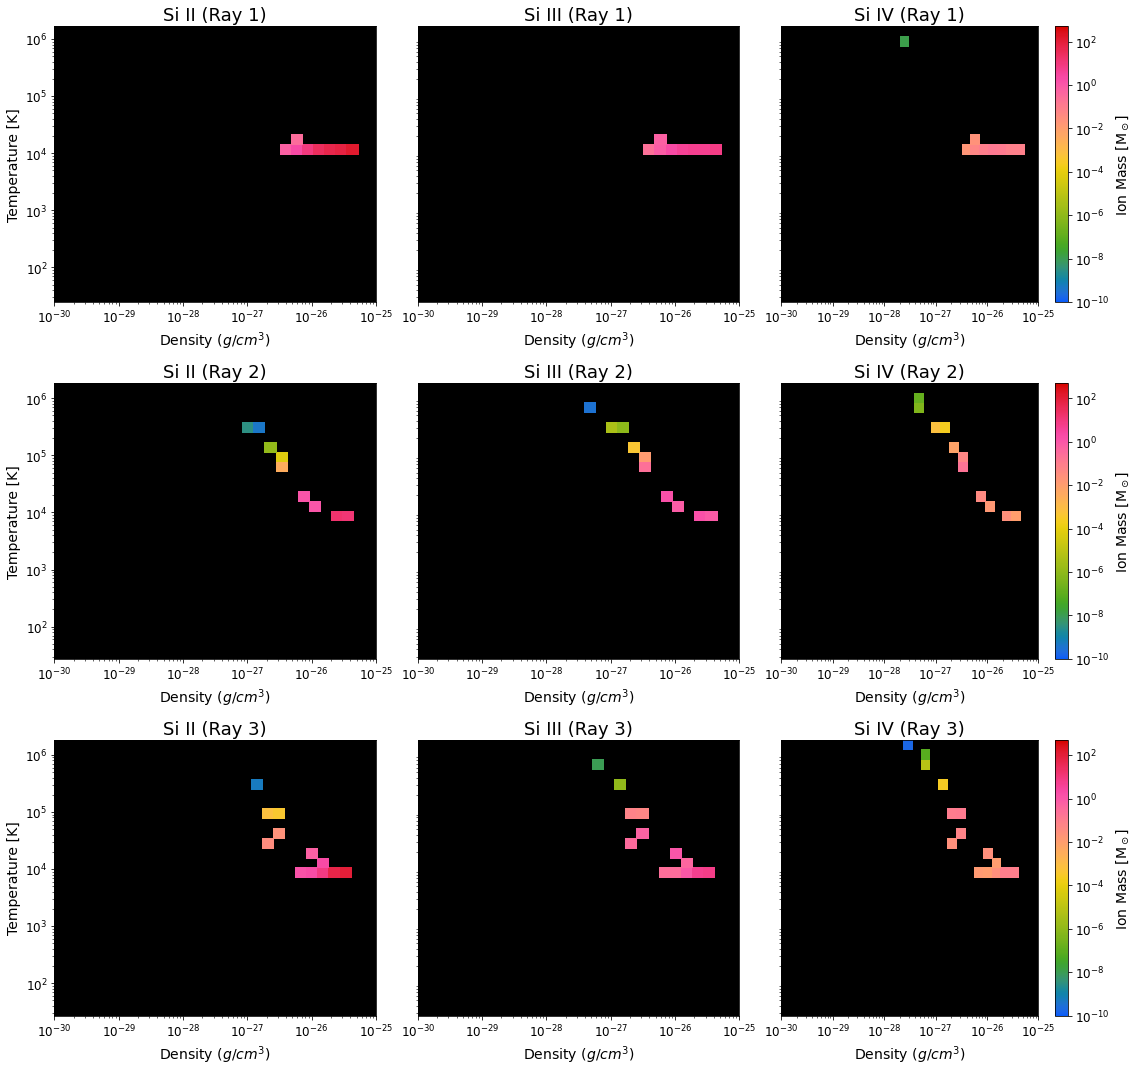

In [105]:
SiII1 = np.array(ray1.all_data()['Si_p1_mass'])/M
SiIII1 = np.array(ray1.all_data()['Si_p2_mass'])/M
SiIV1= np.array(ray1.all_data()['Si_p3_mass'])/M

SiII2 = np.array(ray2.all_data()['Si_p1_mass'])/M
SiIII2 = np.array(ray2.all_data()['Si_p2_mass'])/M
SiIV2= np.array(ray2.all_data()['Si_p3_mass'])/M

SiII3 = np.array(ray3.all_data()['Si_p1_mass'])/M
SiIII3 = np.array(ray3.all_data()['Si_p2_mass'])/M
SiIV3= np.array(ray3.all_data()['Si_p3_mass'])/M

Siz = [SiII1,SiIII1,SiIV1,SiII2,SiIII2,SiIV2,SiII3,SiIII3,SiIV3]
Si_titles = name(['Si II', 'Si III', 'Si IV'])
big_plot(xx,yy,Siz,Si_titles,vmin_=10**-10, vmax_=5*10**2)

# C

<ipython-input-104-4d57cb60e9b4>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y h

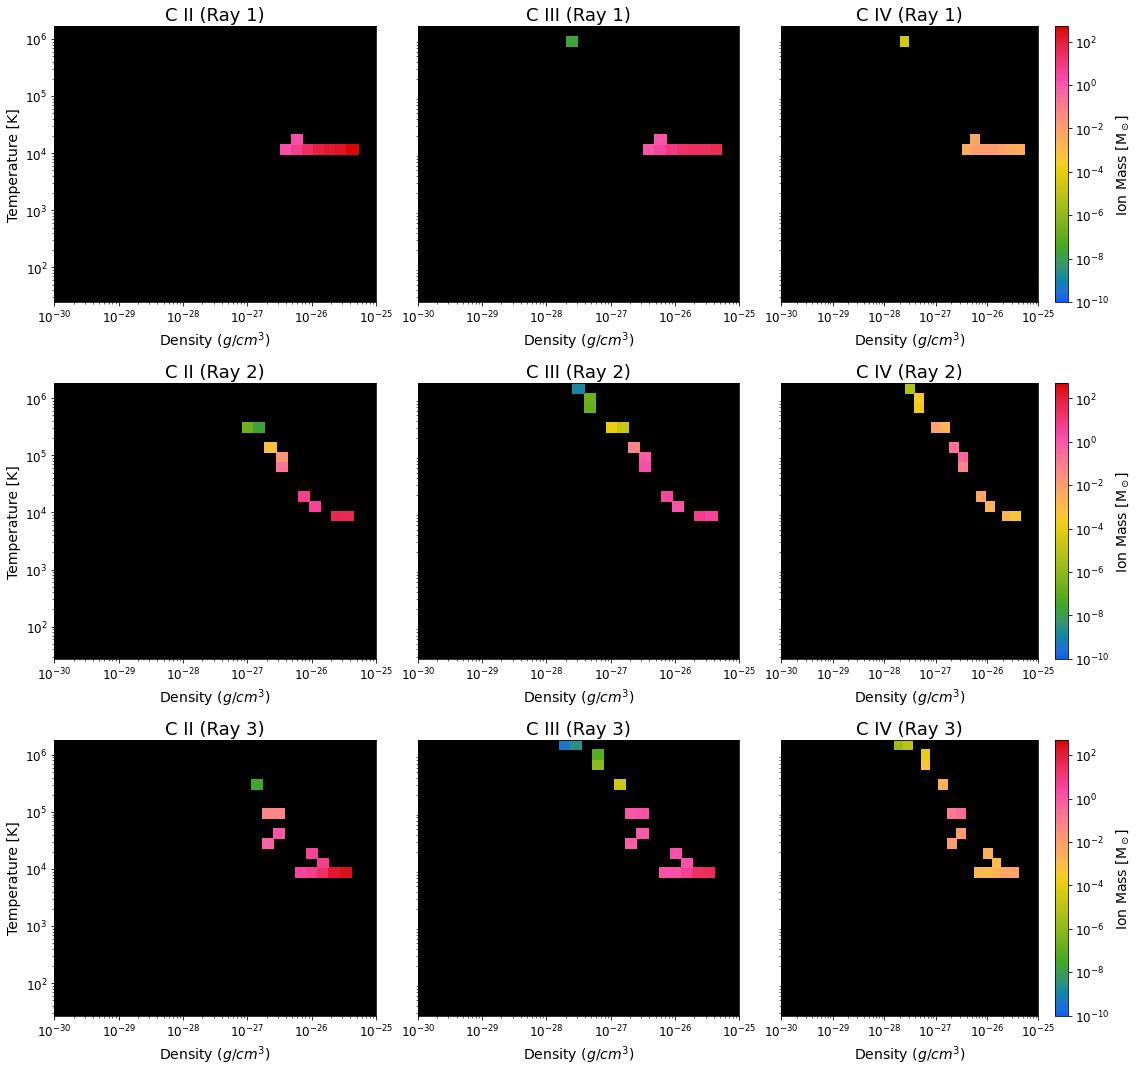

In [106]:
CII1 = np.array(ray1.all_data()['C_p1_mass'])/M
CIII1 = np.array(ray1.all_data()['C_p2_mass'])/M
CIV1 = np.array(ray1.all_data()['C_p3_mass'])/M

CII2 = np.array(ray2.all_data()['C_p1_mass'])/M
CIII2 = np.array(ray2.all_data()['C_p2_mass'])/M
CIV2 = np.array(ray2.all_data()['C_p3_mass'])/M

CII3 = np.array(ray3.all_data()['C_p1_mass'])/M
CIII3 = np.array(ray3.all_data()['C_p2_mass'])/M
CIV3 = np.array(ray3.all_data()['C_p3_mass'])/M

Cz = [CII1, CIII1, CIV1,CII2, CIII2, CIV2,CII3, CIII3, CIV3]
C_titles = name(['C II', 'C III', 'C IV'])

big_plot(xx,yy,Cz,C_titles,vmin_=10**-10,vmax_=5*10**2)

# O

<ipython-input-104-4d57cb60e9b4>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y h

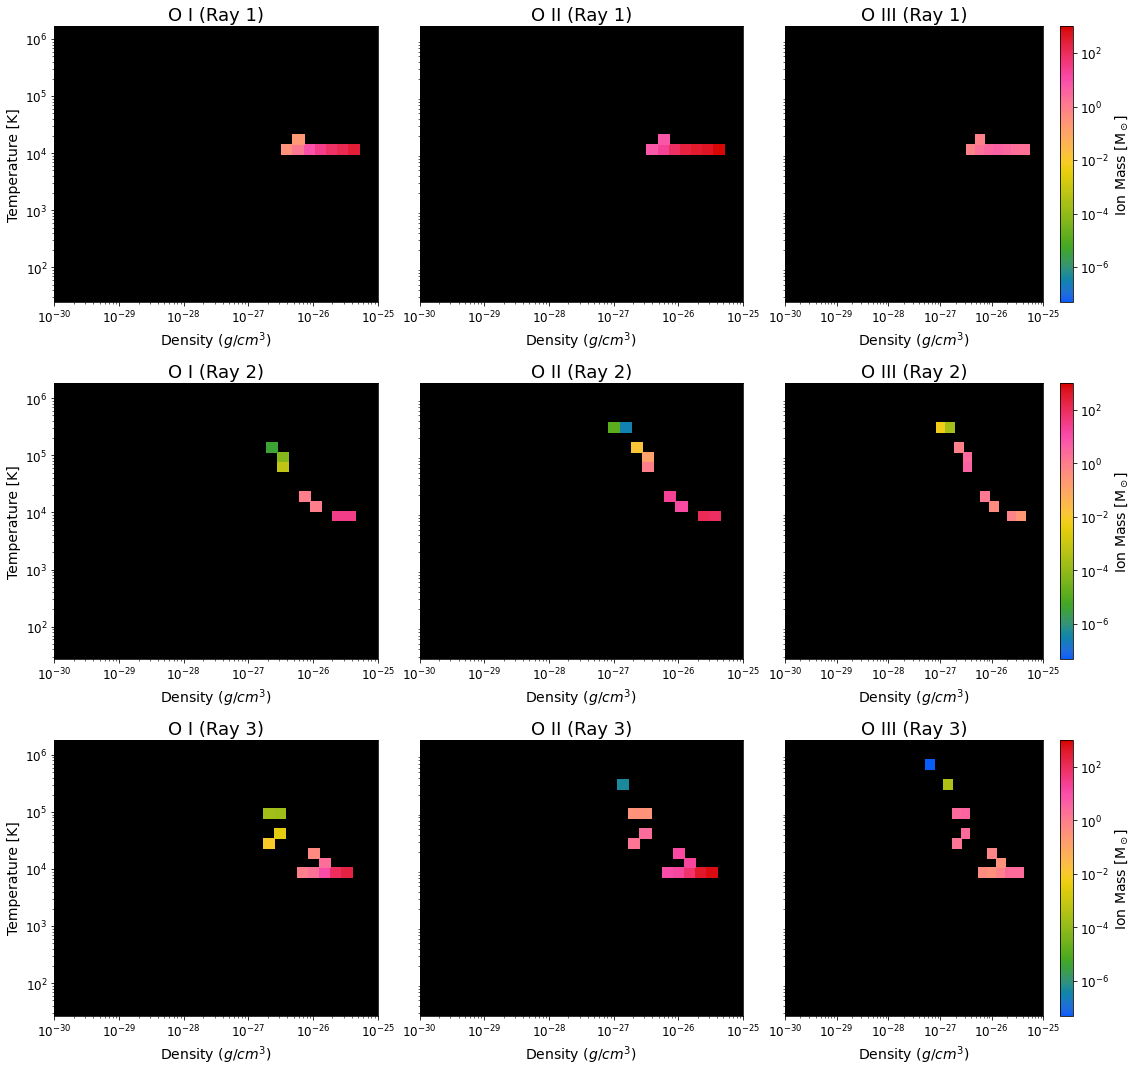

In [107]:
OI1 = np.array(ray1.all_data()['O_p0_mass'])/M
OII1 = np.array(ray1.all_data()['O_p1_mass'])/M
OIII1 = np.array(ray1.all_data()['O_p2_mass'])/M

OI2 = np.array(ray2.all_data()['O_p0_mass'])/M
OII2 = np.array(ray2.all_data()['O_p1_mass'])/M
OIII2 = np.array(ray2.all_data()['O_p2_mass'])/M

OI3 = np.array(ray3.all_data()['O_p0_mass'])/M
OII3 = np.array(ray3.all_data()['O_p1_mass'])/M
OIII3 = np.array(ray3.all_data()['O_p2_mass'])/M

Oz = [OI1, OII1, OIII1, OI2, OII2, OIII2, OI3, OII3, OIII3]
O_titles = name(['O I', "O II", 'O III'])
big_plot(xx,yy,Oz,O_titles, vmin_=5*10**-8,vmax_=10**3)

# Al

<ipython-input-104-4d57cb60e9b4>:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:255: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:275: MatplotlibDeprecationWarning: shading='flat' when X and 

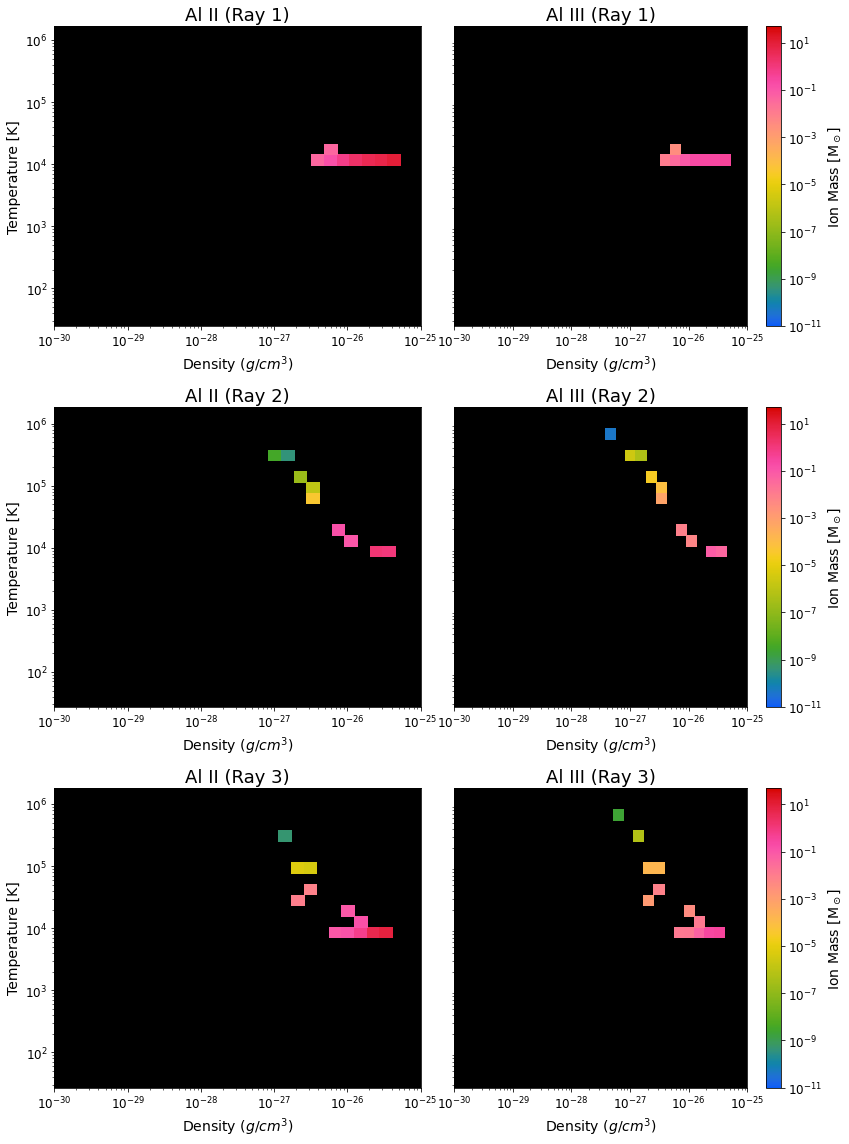

In [109]:
AlII1 = np.array(ray1.all_data()['Al_p1_mass'])/M
AlIII1 = np.array(ray1.all_data()['Al_p2_mass'])/M

AlII2 = np.array(ray2.all_data()['Al_p1_mass'])/M
AlIII2 = np.array(ray2.all_data()['Al_p2_mass'])/M

AlII3 = np.array(ray3.all_data()['Al_p1_mass'])/M
AlIII3 = np.array(ray3.all_data()['Al_p2_mass'])/M

Alz = [AlII1, AlIII1, AlII2, AlIII2, AlII3, AlIII3]
Al_titles = name(['Al II', 'Al III'])
big_plot(xx, yy, Alz, Al_titles, vmin_=10**-11, vmax_=5*10**1, four=False)

# Fe

<ipython-input-104-4d57cb60e9b4>:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:255: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-104-4d57cb60e9b4>:275: MatplotlibDeprecationWarning: shading='flat' when X and 

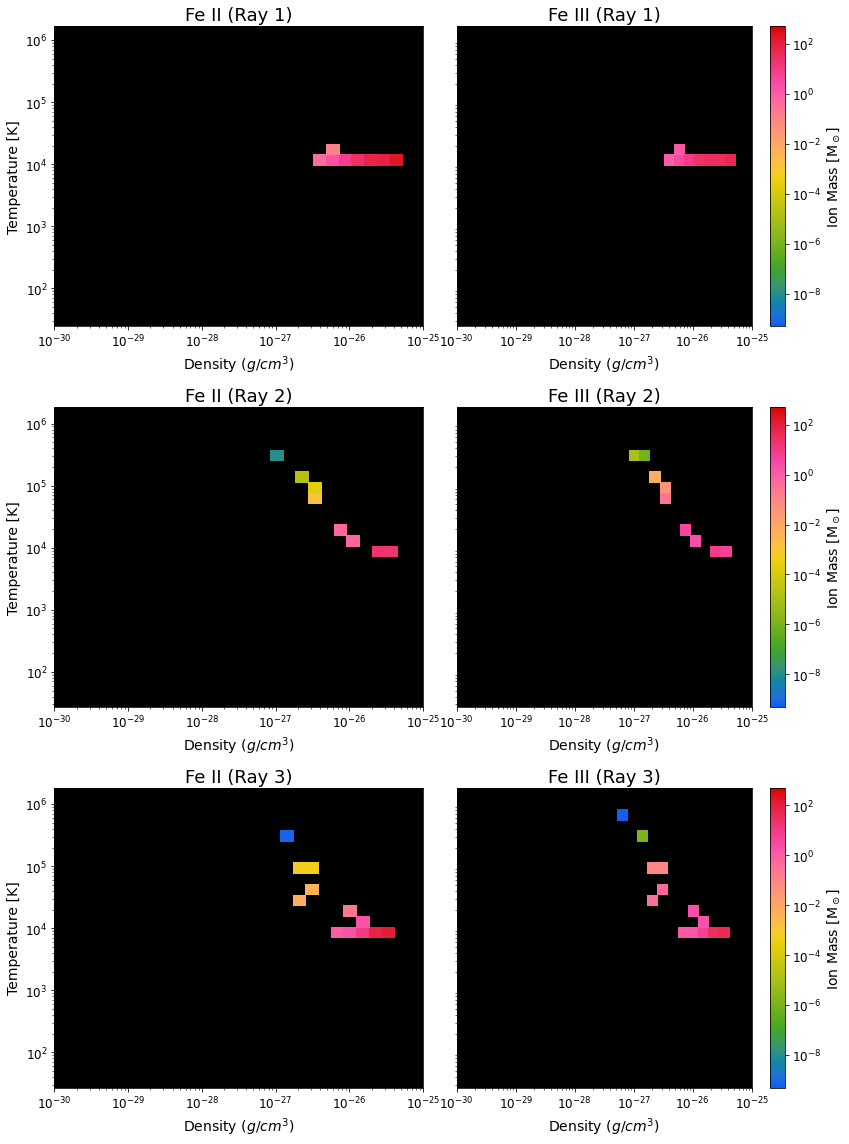

In [111]:
FeII1 = np.array(ray1.all_data()['Fe_p1_mass'])/M
FeIII1 = np.array(ray1.all_data()['Fe_p2_mass'])/M

FeII2 = np.array(ray2.all_data()['Fe_p1_mass'])/M
FeIII2 = np.array(ray2.all_data()['Fe_p2_mass'])/M

FeII3 = np.array(ray3.all_data()['Fe_p1_mass'])/M
FeIII3 = np.array(ray3.all_data()['Fe_p2_mass'])/M

Fez = [FeII1, FeIII1, FeII2, FeIII2, FeII3, FeIII3]
Fe_titles = name(['Fe II', 'Fe III'])
big_plot(xx,yy,Fez,Fe_titles, vmin_=5*10**-10, vmax_=5*10**2, four=False)

# Mg

<ipython-input-152-de1e332c146a>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-152-de1e332c146a>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-152-de1e332c146a>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y h

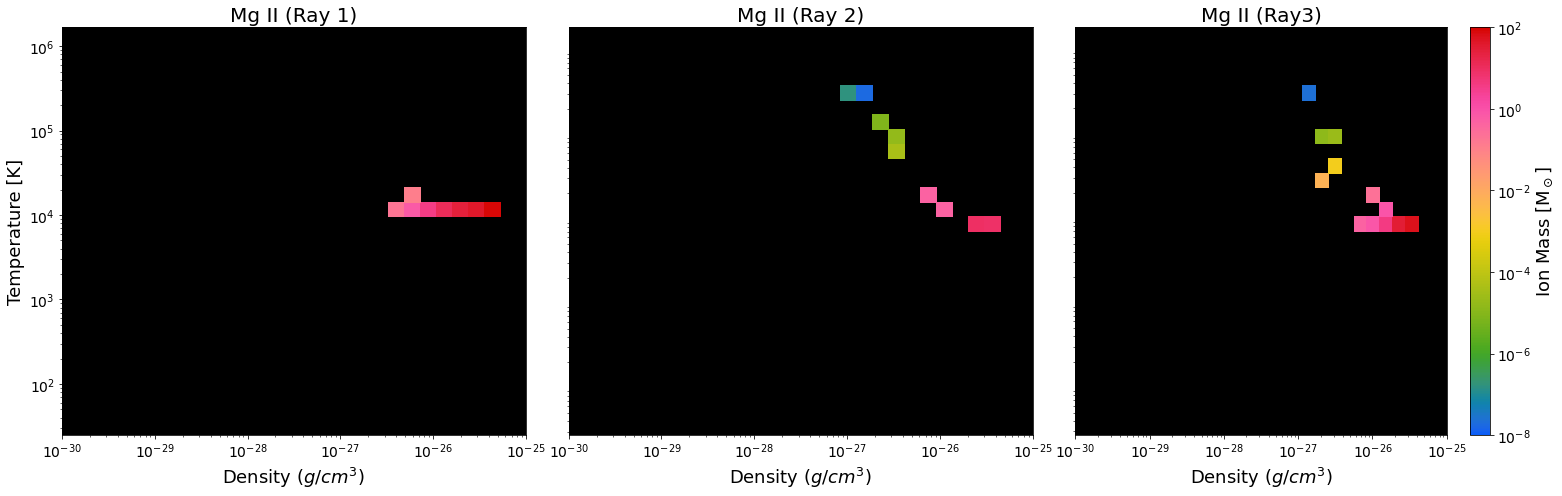

In [153]:
MgII1 = np.array(ray1.all_data()['Mg_p1_mass'])/M
MgII2 = np.array(ray2.all_data()['Mg_p1_mass'])/M
MgII3 = np.array(ray3.all_data()['Mg_p1_mass'])/M

big_plot_mg(xx,yy,[MgII1,MgII2, MgII3],['Mg II (Ray 1)', 'Mg II (Ray 2)', 'Mg II (Ray3)'], 
            vmin_=10**-8, vmax_=10**2)